In [1]:
import numpy as np
import pandas as pd
# 1번
a=pd.read_csv('data01.txt',names=['Korea','Japan','China'])
a.index=range(1800,2001)
a.index.name='year'
a

,Korea,Japan,China
year,,,
1800,2.933238e-07,0.000006,0.000027
1801,3.503958e-07,0.000006,0.000028
1802,2.948867e-07,0.000006,0.000028
1803,2.805510e-07,0.000005,0.000027
1804,2.159331e-07,0.000005,0.000027
...,...,...,...
1996,2.969065e-05,0.000086,0.000092
1997,2.884715e-05,0.000083,0.000094
1998,2.805543e-05,0.000081,0.000095


In [2]:
# 2번
a['SUM']=a.sum(axis=1)
a

,Korea,Japan,China,SUM
year,,,,
1800,2.933238e-07,0.000006,0.000027,0.000033
1801,3.503958e-07,0.000006,0.000028,0.000035
1802,2.948867e-07,0.000006,0.000028,0.000033
1803,2.805510e-07,0.000005,0.000027,0.000033
1804,2.159331e-07,0.000005,0.000027,0.000032
...,...,...,...,...
1996,2.969065e-05,0.000086,0.000092,0.000208
1997,2.884715e-05,0.000083,0.000094,0.000206
1998,2.805543e-05,0.000081,0.000095,0.000204


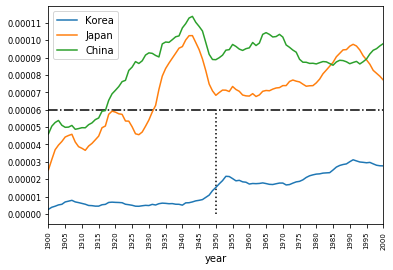

In [3]:
# 3번
%matplotlib inline
import matplotlib.pyplot as plt
a.iloc[100:,:3].plot()
plt.xticks(np.arange(1900,2005,5),rotation=90,fontsize='x-small')
plt.yticks(np.arange(0.00000,0.00012,0.00001),fontsize='small')
plt.xlabel('year')
plt.legend(['Korea','Japan','China'],loc='upper left')
plt.vlines([1950],0.00000,0.00006,linestyles=':')
plt.hlines([0.00006],1900, 2000,linestyles='-.')

Text(0, 0.5, 'Relative Frequency')

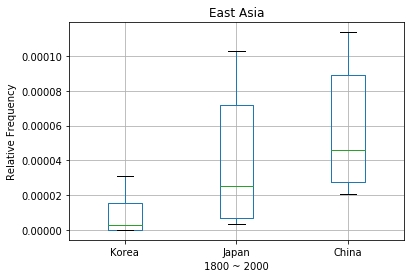

In [4]:
# 4번
a.iloc[:,:3].boxplot()
plt.title('East Asia')
plt.xlabel('1800 ~ 2000')
plt.ylabel('Relative Frequency')


In [5]:
# 5번

b=((a.T/a['SUM']).T).drop(['SUM'],axis=1)
b

,Korea,Japan,China
year,,,
1800,0.008921,0.171531,0.819547
1801,0.010112,0.169685,0.820203
1802,0.008831,0.165201,0.825968
1803,0.008617,0.158271,0.833112
1804,0.006706,0.153820,0.839474
...,...,...,...
1996,0.142846,0.414349,0.442804
1997,0.140295,0.401752,0.457952
1998,0.137494,0.396558,0.465948


In [6]:
# 6번
c= b.sort_values(by='Korea',ascending=False)
c

,Korea,Japan,China
year,,,
1991,0.144487,0.451933,0.403580
1996,0.142846,0.414349,0.442804
1994,0.142717,0.436838,0.420445
1995,0.142221,0.427689,0.430091
1993,0.142143,0.448001,0.409856
...,...,...,...
1866,0.000863,0.230959,0.768178
1825,0.000660,0.177228,0.822111
1824,0.000641,0.180648,0.818711


In [7]:
# 7번
d=c.idxmax()
d

Korea    1991
Japan    1939
China    1840
dtype: int64

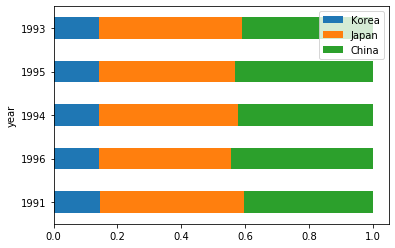

In [8]:
# 8번
c.iloc[:5,:].plot.barh(stacked=True)

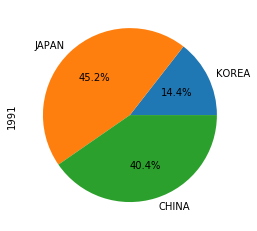

In [9]:
# 9번
c.iloc[0,:].plot.pie(labels=[i.upper() for i in c.columns],autopct='%0.1f%%')

In [10]:
# 10번
e = c.rank(axis=1,ascending = False).astype('i')[['China','Japan','Korea']]
e

,China,Japan,Korea
year,,,
1991,2,1,3
1996,1,2,3
1994,2,1,3
1995,1,2,3
1993,2,1,3
...,...,...,...
1866,1,2,3
1825,1,2,3
1824,1,2,3


In [11]:
# 11번
e.to_csv('DataFrame.txt',sep='\t')

In [12]:
# 12번
f=e.head().reindex(range(1990,1999),fill_value = 0)
f

,China,Japan,Korea
year,,,
1990,0,0,0
1991,2,1,3
1992,0,0,0
1993,2,1,3
1994,2,1,3
1995,1,2,3
1996,1,2,3
1997,0,0,0
1998,0,0,0


In [13]:
# 13번
g=e['Japan'].value_counts()
g

2    191
1     10
Name: Japan, dtype: int64

In [14]:
# 14번
h= e.astype('str').describe()
h

,China,Japan,Korea
count,201,201,201
unique,2,2,1
top,1,2,3
freq,191,191,201


In [15]:
# 15번
i = h.iloc[[0,3,2,1],[2,1,0]]
i

,Korea,Japan,China
count,201,201,201
freq,201,191,191
top,3,2,1
unique,1,2,2
